In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import neural_network
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('data/MedicalCostPersonal/insurance.csv', encoding='utf-8')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x=='yes' else 0)

In [33]:
df = pd.get_dummies(data=df, columns=['region'])

In [34]:
df.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [36]:
df.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [37]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(1070, 9)
(268, 9)


In [42]:
models = [linear_model.LinearRegression(),
          neighbors.KNeighborsRegressor(),
          svm.SVR(),
          neural_network.MLPRegressor(),
          tree.DecisionTreeRegressor(max_depth=3),
          ensemble.RandomForestRegressor(max_depth=3),
          ensemble.GradientBoostingRegressor(n_estimators=100)]

In [43]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.758270,3962.608023,3.434805e+07,5860.720701,0.716727,4624.524045,4.578247e+07,6766.274697
1,KNeighborsRegressor,0.425468,6018.387434,8.163663e+07,9035.299372,0.108290,8354.029068,1.441177e+08,12004.901486
2,SVR,-0.103930,8138.062178,1.568602e+08,12524.383518,-0.201087,9023.010261,1.941190e+08,13932.660710
3,DecisionTreeRegressor,0.865773,2559.104090,1.907261e+07,4367.219541,0.809313,3247.380476,3.081881e+07,5551.469034
4,RandomForestRegressor,0.871814,2434.148758,1.821429e+07,4267.820142,0.820827,3055.270249,2.895792e+07,5381.256586
5,GradientBoostingRegressor,0.907920,1914.354936,1.308382e+07,3617.156358,0.833022,2772.420188,2.698692e+07,5194.893556


In [80]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler

scaling_columns = ['age', 'bmi', 'children']
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [48]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.758270,3962.608023,3.434805e+07,5860.720701,0.716727,4624.524045,4.578247e+07,6766.274697
1,KNeighborsRegressor,0.776876,3185.321379,3.170419e+07,5630.647399,0.634195,4543.400440,5.912116e+07,7689.028442
2,SVR,-0.102599,8148.101869,1.566710e+08,12516.829036,-0.199282,9028.173958,1.938273e+08,13922.186425
3,DecisionTreeRegressor,0.865773,2559.104090,1.907261e+07,4367.219541,0.809313,3247.380476,3.081881e+07,5551.469034
4,RandomForestRegressor,0.871913,2412.315093,1.820016e+07,4266.164613,0.820302,3038.235607,2.904275e+07,5389.132490
5,GradientBoostingRegressor,0.907920,1914.354936,1.308382e+07,3617.156358,0.833021,2774.979306,2.698698e+07,5194.899223


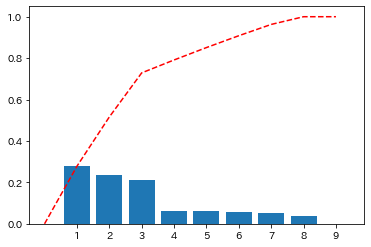

In [75]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [76]:
n = 5
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

In [77]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train_pca,y_train)
    y_pred = model.predict(X_train_pca)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test_pca)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.161272,8298.554902,1.191770e+08,10916.823016,0.129544,9046.207470,1.406827e+08,11860.972901
1,KNeighborsRegressor,0.344464,6747.654654,9.314680e+07,9651.258986,0.006603,9261.579432,1.605523e+08,12670.923043
2,SVR,-0.103808,8148.365800,1.568429e+08,12523.691640,-0.200582,9029.970288,1.940374e+08,13929.731897
3,DecisionTreeRegressor,0.268284,7545.056670,1.039714e+08,10196.637909,0.142788,8542.102027,1.385421e+08,11770.390995
4,RandomForestRegressor,0.310578,7347.236403,9.796166e+07,9897.558077,0.213343,8218.869956,1.271391e+08,11275.597904
5,GradientBoostingRegressor,0.762074,4230.941982,3.380748e+07,5814.419981,0.478091,6609.557281,8.435059e+07,9184.257558
